In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [10]:
dataset = pd.read_csv('/Users/gaganaananda/Desktop/ML_internship/Salary_Prediction/salary_data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

In [11]:
#Split the train set and test set datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)


In [12]:
# Implement linear regression from scratch
class LinearRegressionFromScratch:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        # Initialize weights and bias
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        # Gradient Descent
        for epoch in range(self.epochs):
            # Predicted values
            y_pred = self.predict(X)

            # Calculate gradients
            dw = (1 / len(X)) * np.dot(X.T, (y_pred - y))
            db = (1 / len(X)) * np.sum(y_pred - y)

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

In [13]:
lr_model = LinearRegressionFromScratch()

# Train the model
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = lr_model.predict(X_test)


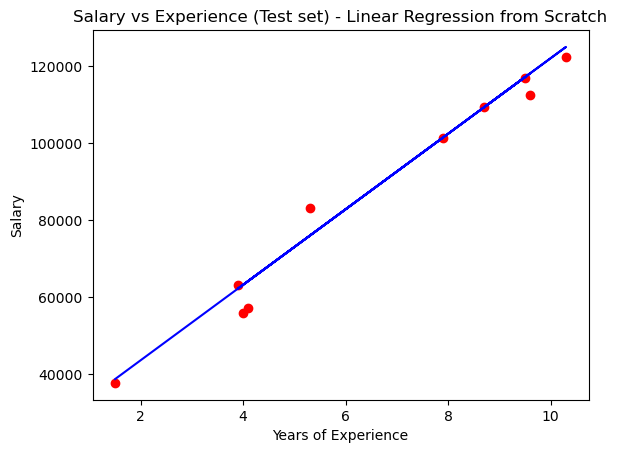

In [14]:
plt.scatter(X_test, y_test, color='red')
plt.plot(X_test, y_pred_lr, color='blue')
plt.title('Salary vs Experience (Test set) - Linear Regression from Scratch')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [15]:
# Calculate R-squared
r2 = r2_score(y_test, y_pred_lr)
print(f'R-squared: {r2}')

R-squared: 0.9765025869195799


In [16]:
from scipy import stats
# Calculate statistical metrics for p-values using SciPy's linear regression
X_train_with_constant = np.append(np.ones((X_train.shape[0], 1)), X_train, axis=1)  # Adding constant (bias)
beta = np.append(lr_model.bias, lr_model.weights)  # Coefficients and intercept

# Predicted values for the training set
y_pred_train = lr_model.predict(X_train)

# Calculate residuals
residuals = y_train - y_pred_train

# Degrees of freedom
dof = len(y_train) - X_train_with_constant.shape[1]

# Estimate of variance
variance = np.sum(residuals**2) / dof

# Standard error of beta
X_train_transpose = X_train_with_constant.T
covariance_matrix = np.linalg.inv(np.dot(X_train_transpose, X_train_with_constant))
standard_errors = np.sqrt(np.diag(covariance_matrix) * variance)

# Compute t-statistics for the coefficients
t_stats = beta / standard_errors

# Compute p-values for the t-statistics
p_values = [2 * (1 - stats.t.cdf(np.abs(t), dof)) for t in t_stats]

print("Coefficients:", beta)
print("Standard Errors:", standard_errors)
print("t-statistics:", t_stats)
print("p-values:", p_values)

Coefficients: [24004.75523647  9811.55629829]
Standard Errors: [3104.70528881  578.75882076]
t-statistics: [ 7.73173393 16.95275466]
p-values: [3.969679998050424e-07, 1.6360246490876307e-12]


In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Make predictions on the test set
y_pred_lr = lr_model.predict(X_test)

# Calculate R² score
r2 = r2_score(y_test, y_pred_lr)
print(f"R² score: {r2}")

# Calculate Adjusted R²
n = len(y_test)  # Number of test samples
p = X_test.shape[1]  # Number of predictors (features)
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f"Adjusted R² score: {adjusted_r2}")

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_lr)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_lr)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")


R² score: 0.9765025869195799
Adjusted R² score: 0.9735654102845274
Mean Absolute Error (MAE): 3238.815359621759
Mean Squared Error (MSE): 19695681.317829914
Root Mean Squared Error (RMSE): 4437.981671641955


Interpretation of the Results:

R² score: 0.9765
This means that 97.65% of the variation in the salary (dependent variable) can be explained by the model based on years of experience (independent variable).
 This is a very high score, indicating that the model fits the data well.
Adjusted R² score: 0.9736

Since the Adjusted R² is slightly lower than the regular R², this is expected because the Adjusted R² penalizes the addition of unnecessary variables. 
However, the value is still high, meaning the model is still explaining a large portion of the variability in the data.
Mean Absolute Error (MAE): 3238.82

On average, the predictions are off by around $3,238 from the actual salary. 
This is a reasonable error, depending on the scale of your salary data.
Mean Squared Error (MSE): 19,695,681

The MSE penalizes larger errors more than MAE. A larger MSE typically reflects that there are some outliers or large errors that are impacting the model. 
However, MSE by itself isn’t very intuitive to interpret since it's in the squared units of the target variable (squared salary).
Root Mean Squared Error (RMSE): 4437.98

The RMSE takes the square root of MSE and brings it back to the same unit as your salary, making it easier to interpret. 
On average, your predictions are about $4,437.98 off from the true values, which is still reasonable depending on the typical range of salaries in your dataset.